**Description**

In [1]:
print ('Demo pytorch code for Computer vision and Image analysis : Course project')

Demo pytorch code for Computer vision and Image analysis : Course project


**Running environment options**

Colab: https://colab.research.google.com/

HPC: https://hpc.uni.lu/ (Get accounts early)

Gradients: https://gradient.run/free-gpu

**Libraries**

Pytorch: https://pytorch.org/

Keras: https://keras.io/

Tensorflow: https://www.tensorflow.org/ 

**Mounting Goolge Drive** 

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')

## Checking if the Google Drive mounted correctly
if(os.path.isdir('/content/drive/MyDrive/')):
  print('Google drive mounted')
  base_dir='/content/drive/MyDrive/Tutorial/'
else: 
  print('Google drive not mounted')


Mounted at /content/drive
Google drive mounted


**Loading data**

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import numpy as np

## Transforms to be applied to the data (Some examples: torchvision.transforms.Resize(),transforms.Normalize())
## Read more: https://pytorch.org/vision/stable/transforms.html
transform = transforms.Compose([transforms.ToTensor()])
transform = transforms.Compose([transforms.ToTensor()])

## Downloading and creating Dataset classes
## For custom classifications datasets refer: https://developpaper.com/detailed-explanation-of-the-use-of-imagefolder-in-pytorch/
## For Spark challenge: https://gitlab.uni.lu/spark-challenge/2021-utils/-/blob/master/utils.py
## train/val/test ref: https://blog.roboflow.com/train-test-split/  
trainset = torchvision.datasets.CIFAR10(root=base_dir+'CIFAR-10/', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root=base_dir+'CIFAR-10/', train=False, download=True, transform=transform)

## Defining classes
classes = ('plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck')   

Files already downloaded and verified
Files already downloaded and verified



 Individual images from the dataset:


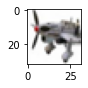

Label: plane


In [4]:
print('\n Individual images from the dataset:')

rand_idx=49
plt.figure(figsize=(1,1))
plt.imshow(transforms.ToPILImage()(trainset[rand_idx][0]))
plt.show()
print('Label:',classes[trainset[rand_idx][1]])

In [5]:
## Creating DataLoaders
## Read more: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
batch_size_train=256
batch_size_test=2048
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test, shuffle=False)


 Sample images from the dataset:


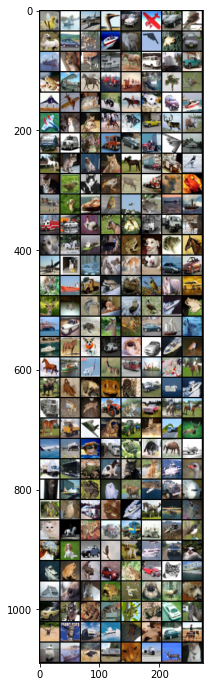

  dog  ship plane  bird   car plane   car  bird horse   car  deer  ship   dog plane  frog   car  ship   dog   cat  ship horse   car truck   car  frog plane horse truck truck  ship  frog  bird plane plane   cat   dog horse   dog   car  ship plane   dog  frog horse   dog   car  deer  deer truck   car   cat truck   car truck plane  ship horse   cat   dog   cat horse truck   car  bird   cat  bird   cat  frog  deer truck  deer  frog plane   dog  ship  bird plane   cat  ship  ship truck   car   cat  deer  deer truck truck  deer   dog horse  ship  bird  frog   dog  frog horse plane   dog   cat horse  deer   cat   car   car   cat  ship truck  frog  frog  bird horse   car  deer  frog  bird   dog  ship  bird  ship  frog  ship   car  frog  deer  deer   car  ship  deer  ship horse   dog   car   dog   car  ship  frog horse  ship plane  deer truck  ship   dog horse  deer   cat   dog  frog   cat truck  ship  ship truck  frog   cat truck   cat   car horse horse horse truck plane   dog truck   cat truc

In [6]:
## Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## Show images
print('\n Sample images from the dataset:')
img_samples_grid=torchvision.utils.make_grid(images)
plt.figure(figsize=(12,12))
plt.imshow(transforms.ToPILImage()(img_samples_grid))
plt.show()
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size_train))) 

**Creating CNN model**

In [7]:
import torch.nn as nn
import torch.nn.functional as F

## Defining a convolutional neural network
## Available layers: https://pytorch.org/docs/stable/nn.html
## Model Zoo: https://pytorch.org/serve/model_zoo.html
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        ## Convolution block 1
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)

        ## Convolution block 2
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        ## Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

**Defining loss function**

In [8]:
import torch.optim as optim

## Defining loss function to be used
criterion = nn.CrossEntropyLoss()
## Optimizer to be used (Some commonly used optimizers are: SGD,Adam etc)
optimizer = optim.Adam(net.parameters(),lr=0.001)

**Training**

In [13]:
## loop over the dataset multiple times
nb_epoch=3
loss_per_epoch_train = []
acc_per_epoch_test=[]

print('============================Training: Start============================')
for epoch in range(nb_epoch):  

        loss_train=0
        for i, data in enumerate(trainloader, 0):
            
            ## Getting inputs
            inputs, labels = data

            ## Gradients set to zero
            optimizer.zero_grad()

            ## Forward pass
            outputs = net(inputs)

            ## Calculating loss
            loss = criterion(outputs, labels)

            ## Calculating gradients
            loss.backward()
            loss_train=loss_train+loss.item()

            ## Updating weights
            optimizer.step()
            
        print('epoch:',epoch,'train loss:',loss_train)  
        loss_per_epoch_train.append(loss_train)

print('============================Training: End============================')


============================Training: Start============================
epoch: 0 train loss: 293.96533739566803
epoch: 1 train loss: 282.38274598121643
epoch: 2 train loss: 272.37092220783234
============================Training: End============================


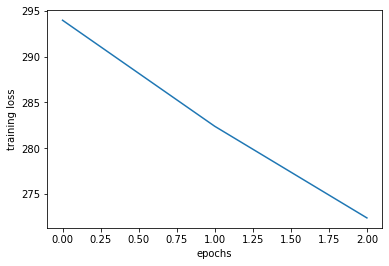

In [14]:
plt.plot(loss_per_epoch_train)
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.show()

**Saving the model**


In [15]:
PATH = base_dir+'models/cifar_net.pth'
torch.save(net.state_dict(), PATH)

**Restoring the model**

In [16]:
model_restored = Net()
model_restored.load_state_dict(torch.load(PATH))

<All keys matched successfully>

**Testing**

In [21]:
correct = 0
total = 0

## Disable gradient calculation and infer the model on test set
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_restored(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

## Print accuracy on test set
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 49 %


In [22]:
## Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

## Collect the correct predictions for each class
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_restored(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


## Print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,accuracy))

Accuracy for class plane is: 44.7 %
Accuracy for class car   is: 67.9 %
Accuracy for class bird  is: 48.7 %
Accuracy for class cat   is: 39.0 %
Accuracy for class deer  is: 32.2 %
Accuracy for class dog   is: 26.8 %
Accuracy for class frog  is: 62.9 %
Accuracy for class horse is: 57.0 %
Accuracy for class ship  is: 72.3 %
Accuracy for class truck is: 46.3 %
